In [1]:
import pandas as pd

data1 = pd.read_csv(r'data\dataset1.csv', error_bad_lines=False,sep=';')
data2 = pd.read_csv(r'data\dataset2.csv', error_bad_lines=False,sep=';')
data3 = pd.read_csv(r'data\dataset3.csv', error_bad_lines=False,sep=';')
data4 = pd.read_csv(r'data\dataset4.csv', error_bad_lines=False,sep=';')
frames = [data1,data2,data3,data4]
us_election = pd.concat(frames,ignore_index=True)

In [2]:
us_election.head()

,ACFS,Adult.obesity,Adult.smoking,Adults.65.and.Older.Living.in.Poverty,African.American.Population,Amerindian,Asian,Asian.American.Population,At.Least.Bachelor.s.Degree,At.Least.High.School.Diploma,...,summer_TAVG,summer_TMAX,summer_TMIN,temp,temp_bins,votes,winter_PRCP,winter_TAVG,winter_TMAX,winter_TMIN
0,0.000044,0.300,0.183,6.85,23.55,0.55,2.35,2.35,37.4,87.8,...,773.0,885.0,660.0,15.333333,"14.9, 16.6",159473,1607.0,412.0,524.0,300.0
1,0.000024,0.314,0.173,7.95,3.85,4.75,1.45,1.45,17.9,83.7,...,NaN,NaN,NaN,NaN,NaN,77387,NaN,NaN,NaN,NaN
2,0.000115,0.373,0.251,21.30,46.50,0.35,0.25,0.25,13.5,71.9,...,783.0,903.0,663.0,17.333333,"16.6, 18.5",10390,NaN,470.0,601.0,339.0
3,0.000043,0.384,0.231,15.45,31.45,0.25,0.40,0.40,11.9,75.7,...,NaN,NaN,NaN,NaN,NaN,33218,NaN,NaN,NaN,NaN
4,0.000507,0.368,0.362,24.15,53.60,0.10,0.30,0.30,12.6,69.3,...,813.0,918.0,708.0,17.833333,"16.6, 18.5",4176,1662.5,454.0,561.0,347.5


In [3]:
location = input("State:")
education_level_df = us_election[['ST','Clinton H','Trump D','Less.Than.High.School','At.Least.High.School.Diploma','At.Least.Bachelor.s.Degree','Total.Population']]
less_highschool = 0
highschool= 0
great_highschool = 0
sum_H = 0
sum_T = 0
total_population = 0

for i in range(3113):
    if education_level_df.ST[i] == location:
        less_highschool = less_highschool + education_level_df['Less.Than.High.School'][i] * education_level_df['Total.Population'][i] * 0.01
        highschool = highschool + (education_level_df['At.Least.High.School.Diploma'][i] - education_level_df['At.Least.Bachelor.s.Degree'][i]) * education_level_df['Total.Population'][i] * 0.01
        great_highschool = great_highschool + education_level_df['At.Least.Bachelor.s.Degree'][i] * education_level_df['Total.Population'][i] * 0.01
        sum_H += education_level_df['Clinton H'][i]
        sum_T += education_level_df['Trump D'][i]

State:CA


In [4]:
education_level_df.head()

,ST,Clinton H,Trump D,Less.Than.High.School,At.Least.High.School.Diploma,At.Least.Bachelor.s.Degree,Total.Population
0,AL,62435,89199,12.2,87.8,37.4,324429.0
1,AZ,29546,44432,16.3,83.7,17.9,335941.5
2,AL,4848,5431,28.1,71.9,13.5,28560.0
3,AL,12108,20596,24.3,75.7,11.9,81240.5
4,AR,2350,1716,30.7,69.3,12.6,12039.5


Hillary has higher vote


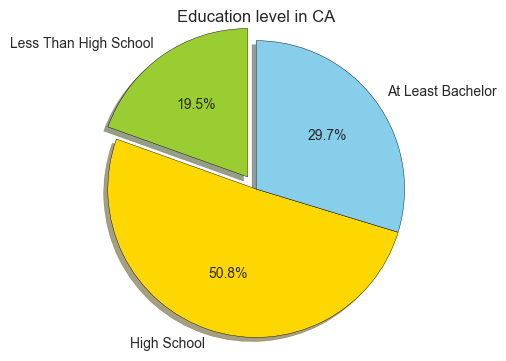

In [5]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
if sum_T > sum_H:
    print("Trump has higher vote")
else:
    print("Hillary has higher vote")
labels = 'Less Than High School','High School','At Least Bachelor'
sizes = [less_highschool,highschool,great_highschool]
colors = ['yellowgreen', 'gold', 'skyblue']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode,labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=90)

plt.axis('equal')
plt.savefig("education_level_by_county.png")
plt.title('Education level in '+location)
plt.show()